## Remarque préliminaire.
Afin d'éviter les problèmes de droits ou de temps de téléchargement, il est recommandé d'ouvrir le présent fichier avec Google Colab (un service cloud gratuit permettant de travailler avec des *notebooks* Jupyter)

# TP Algorithme de Dijkstra
L'objectif de ce TP est d'implémenter l'algorithme de Dijkstra vu en cours, dans le but de l'appliquer sur un problème concret : calculer le meilleur itinéraire entre deux points d'une ville, et l'afficher sur une carte. Pour cela, vous allez dans un premier temps prendre en main la bibliothèque *NetworkX*.

[NetworkX](https://networkx.org/) est une bibliothèque Python dédiée à l'études des graphes et des réseaux. La documentation officielle est disponible [ici](https://networkx.org/documentation/stable/tutorial.html).

💡 si NetworkX n'est pas présent sur votre machine, vous pouvez l'installer avec la commande `pip install networkx`.

De plus, la commande suivante peut être utile quand on veut afficher plusieurs résultats au sein d'une même cellule.

In [6]:

# Cellule de test

print('hola')

hola


In [7]:
# affiche tous les résultats d'une cellule, et pas uniquement le dernier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

 
 ## Premiers pas avec NetworkX
 ### Créer un graphe

Il existe plusieurs méthodes pour créer un graphe. La plus simple est de créer un graphe vide :

In [8]:
import networkx as nx
import numpy as np
G = nx.Graph() # ou Digraph() pour un graphe orienté 
# G -> Graphe vide

On peut aussi fournir au constructeur une liste d'arêtes / arcs :

In [9]:
edgelist = [(0, 1), (1, 2), (2, 3)]
G = nx.Graph(edgelist)
# Dessin du graph G
# nx.draw(G, with_labels=True) 

Il peut être plus pratique de fournir une matrice :

array([[0, 1, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 1, 0, 0]])

EdgeView([(0, 1), (0, 2), (0, 3), (1, 3)])

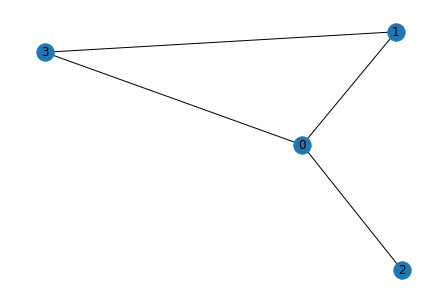

In [10]:
adjacency_matrix = np.array([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [1, 1, 0, 0]])
adjacency_matrix
G = nx.Graph(adjacency_matrix, nodetype=int)
G.edges()
nx.draw(G, with_labels=True)

NetworkX dispose aussi de nombreux graphes "prêts à l'emploi" ou [générateurs](https://networkx.org/documentation/stable/reference/generators.html) :

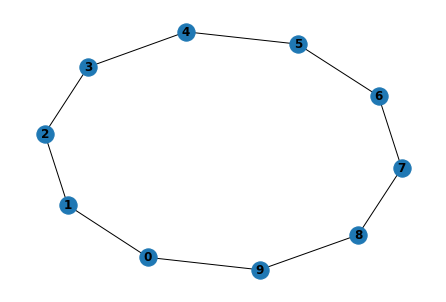

In [11]:
G = nx.cycle_graph(10)
nx.draw(G, with_labels=True, font_weight='bold')

Enfin, on peut aussi créer un graphe à partir d'un autre graphe en utilisant l'une des deux méthodes suivantes :

In [12]:
H = nx.Graph(G)
H = G.copy()

Il est bien sûr possible de construire un graphe à partir d'un fichier, qui contient par exemple les listes d'adjacences des sommets :
```
fichier adjacency_list.dat

0 1 2 3 
1 3 5
3 4
```

In [13]:
# G = nx.read_adjlist('adjacency_list.dat', nodetype=int)

### Afficher un graphe

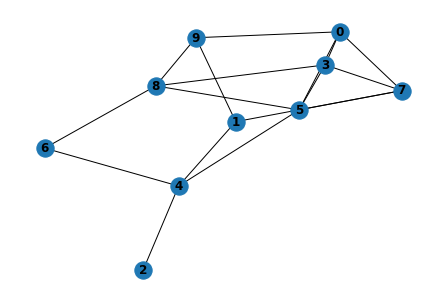

In [14]:
G = nx.gnp_random_graph(10, 0.4)
nx.draw(G, with_labels=True, font_weight='bold')

Par défaut, la position des sommets est aléatoire et change à chaque exécution. Si on demande de dessiner le même graphe une seconde fois, le résultat sera différent :

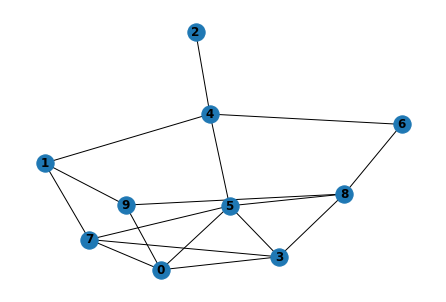

In [15]:
nx.draw(G, with_labels=True, font_weight='bold')

Il est cependant possible de spécifier explicitement les positions des noeuds, grâce aux fonctions `*_layout`. Par exemple, la fonction `random_layout` renvoie les positions aléatoires des noeuds, qu'on peut stocker pour redessiner exactement le même graphe :

{0: array([0.5952245 , 0.01474455], dtype=float32),
 1: array([0.21971667, 0.26496476], dtype=float32),
 2: array([0.46970433, 0.45385408], dtype=float32),
 3: array([0.620133  , 0.52314335], dtype=float32),
 4: array([0.38021404, 0.76366925], dtype=float32),
 5: array([0.8014104, 0.6218806], dtype=float32),
 6: array([0.03989237, 0.14357986], dtype=float32),
 7: array([0.03313618, 0.5645604 ], dtype=float32),
 8: array([0.5570231, 0.7857968], dtype=float32),
 9: array([0.25337353, 0.2675131 ], dtype=float32)}

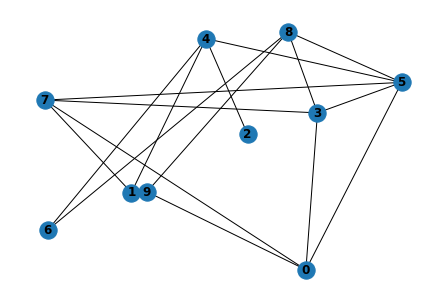

In [16]:
pos = nx.random_layout(G)
pos
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')

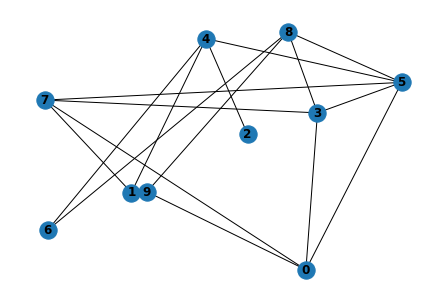

In [17]:
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')

NetworkX dispose de plusieurs dispositions (ou *layouts*) prédéfinies. On peut par exemple demander une disposition des sommets circulaire :

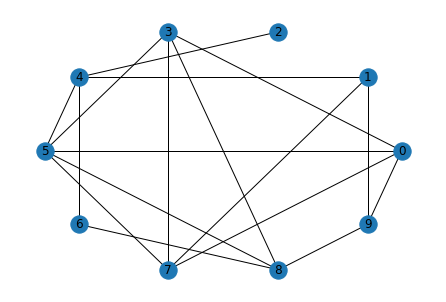

In [18]:
nx.draw_circular(G, with_labels=True)

Les possibilités sont infinies !

In [19]:
G = nx.MultiGraph()
G.add_nodes_from([('A', {'pop':1000, 'lifeq':'+'}), ('B', ('pop':5000, 'lifeq':'o'}),\
                  ('C', ('pop': 7500, 'lifeq':'+'}), ('D', ('pop': 3200, 'lifeq':'-'}),\
                 ('E', ('pop': 8500, 'lifeq':'o'}), ('F', {'pop':2100, 'lifeq':'-'})])

G.add_edges_from([ ('A', 'D', {'speed':'fast'}),
                   ('E', 'D', {'speed':'fast'}),
                   ('F', 'C', {'speed':'slow'}),
                  ('E', 'C', {'speed':'slow'}),
                 ('B', 'D', {'speed':'medium'}),
                 ('E', 'B', {'speed':'medium'}),
                 ('A', 'F', {'speed':'fast'})])

names = {'A': 'Appleville', 'B':'Boomtown', 'C':'Carrot-City', 'D':'Darktown', 'E':'Elephant-Gardens', 'F':'Fluxhole'}

# node size
population = [nx.get_node_attributes(G, 'pop')[node]/10. for node in G]

# node color
color_of_quality = {'+': 'green', '-':'red', 'o':'grey'}
quality_colors = [color_of_quality[nx.get_node_attributes(G, 'lifeq')[node]] for node in G]

# edge color
color_of_transport={'slow':'black', 'medium':'navy', 'fast':'gold'}
transport_colors = [color_of_transport[prop['speed']] for u, v, prop in G.edges(data=True)]

nx.draw_circular(G, \
                 node_size=population, \
                 node_color=quality_colors, \
                 edge_color=transport_colors, \
                 width=2, \
                 with_labels=True, \
                 labels=names)

SyntaxError: closing parenthesis '}' does not match opening parenthesis '(' (3849995096.py, line 2)

💡 Il est fortement conseillé de visiter le site de la principale bibliothèque Python de visualisation de données, [Matplotlib](https://matplotlib.org/).

### Ajouter des sommets ou des arêtes / arcs

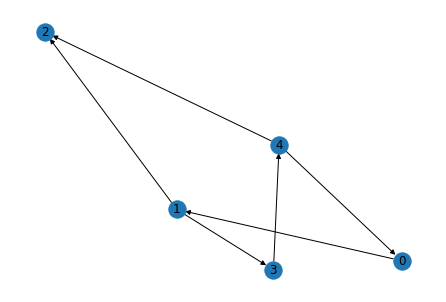

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_edges_from([(0,1),(3,4),(4,2),(1,3),(4,0),(1,2)])

nx.draw(G, with_labels=True)

💡 NetworkX se contente d'ignorer les sommets ou arêtes / arcs qui seraient éventuellement déjà présents dans le graphe.

💡 Les identifiants de sommets ne sont pas limités à des nombres : NetworkX accepte n'importe quelle donnée *hachable* (c'est-à-dire à partir de laquelle on peut calculer un identifiant), comme une chaîne de caractère, une image, un fichier XML... :

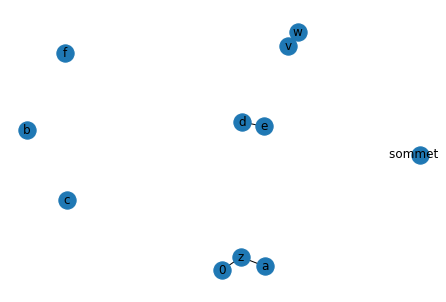

In [ ]:
G = nx.Graph()
G.add_node("sommet 1")    # ajoute le sommet "sommet 1"
G.add_nodes_from("abcdef")  # adds 6 sommets: 'a', 'b', 'c', 'd', 'e', 'f'
G.add_edge(0, 'z')
G.add_edges_from([("a", "z"), ("e", "d"), ("v", "w")])

nx.draw(G, with_labels=True)

### Supprimer des sommets ou des arêtes / arcs

1

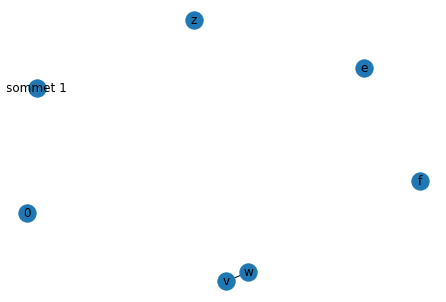

In [ ]:
G.remove_node('c')
G.remove_nodes_from("abcd")
G.remove_edge(0, 'z')

nx.draw(G, with_labels=True)

### Obtenir des renseignements sur un graphe
NetworkX dispose de nombreuses fonctions permettant d'obtenir des renseignements sur un graphe, notamment :
-   `g.degree()`  : degrés des sommets du graphe g
-   `g.number_of_nodes()`  : nombre de sommets du graphe g
-   `g.number_of_edges()`  : nombre d’arcs du graphe g
-   `g.predecessors(i)`  : liste des prédécesseurs du sommet i
-   `g.successors(i)`  : liste des successeurs du sommet i
-   `g.neighbors(i)`  : liste des voisins du sommet i

⚠️ Pour un graphe orienté, `DiGraph.neighbors` est un synonyme de `DiGraph.successors`.

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_edges_from([(0,1),(3,4),(4,2),(1,3),(4,0),(1,2)])
G.number_of_nodes()
G.number_of_edges()
list(G.nodes)
list(G.edges)
G.degree[1]
list(G.successors(1))
list(G.predecessors(1))
list(G.neighbors(1)) # ou list(G.adj[1])

5

6

[0, 1, 2, 3, 4]

[(0, 1), (1, 3), (1, 2), (3, 4), (4, 2), (4, 0)]

3

[3, 2]

[0]

[3, 2]

### Matrices
NetworkX permet d'obtenir directement la matrice d'incidence ou d'adjacence d'un graphe :

In [ ]:
nx.incidence_matrix(G).todense()
nx.adjacency_matrix(G).todense()

matrix([[1., 0., 0., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1.]])

matrix([[0, 1, 0, 0, 0],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0]], dtype=int32)

Il sera parfois plus commode de manipuler une autre représentation, basée sur des dictionnaires (ce qui correspond plus ou moins à une liste d'adjacence) :

In [ ]:
nx.to_dict_of_dicts(G)

{'sommet 1': {},
 'a': {'z': {}},
 'b': {},
 'c': {},
 'd': {'e': {}},
 'e': {'d': {}},
 'f': {},
 0: {'z': {}},
 'z': {0: {}, 'a': {}},
 'v': {'w': {}},
 'w': {'v': {}}}

## Exercice 1

Dans la suite, vous aurez besoin des packages `networkx`, `matplotlib` et `scipy`. Installez-les à l'aide de la commande `pip install *package*` (dans un terminal) si vous ne les avez pas sur votre machine.

In [ ]:
import networkx as nx
import scipy
import matplotlib.pyplot as plt

Q1 : Créez le graphe de Petersen en donnant explicitement la liste de ses arêtes

In [ ]:
edgeList = [
    (1, 6),
    (2, 7),
    (3, 8),
    (4, 9),
    (5, 10),
    (1, 3),
    (1, 4),
    (2, 4),
    (2, 5),
    (3, 1),
    (3, 5),
    (8, 7),
    (8, 9),
    (6, 10),
    (6, 7),
    (9, 10),
]

petersen = nx.Graph(edgeList)


Q2 : Affichez le graphe créé, en indiquant les numéros de sommets en gras

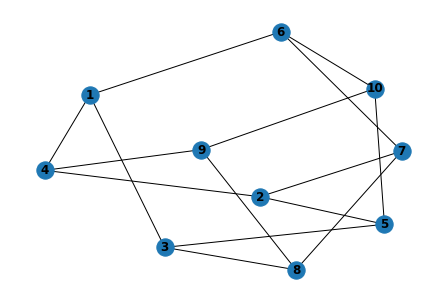

In [ ]:
nx.draw(petersen, with_labels=True, font_weight='bold')


Par défaut, les sommets sont disposés de manière aléatoire, ce qui ne facilite pas la lecture des graphes ayant une structure régulière, comme le graphe de Petersen. Cherchez dans la documentation de NetworkX une autre fonction permettant d'afficher ce graphe sous une forme plus "classique".

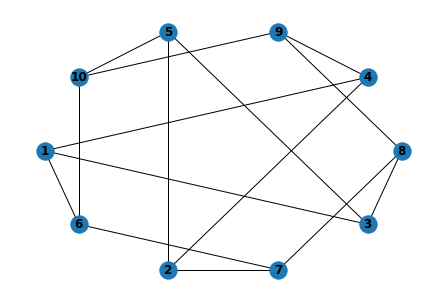

In [ ]:
nx.draw_shell(petersen, font_weight='bold', with_labels=True)


**Pour les questions qui suivent, donnez la réponse en utilisant les fonctions de NetworkX**

Ce graphe est-il orienté ou non orienté ?

In [ ]:
petersen.is_directed()

False

Quels sont ses sommets et ses arêtes ?

In [ ]:
list(petersen.nodes())


[1, 6, 2, 7, 3, 8, 4, 9, 5, 10]

In [ ]:
list(petersen.edges())

[(1, 6),
 (1, 3),
 (1, 4),
 (6, 10),
 (6, 7),
 (2, 7),
 (2, 4),
 (2, 5),
 (7, 8),
 (3, 8),
 (3, 5),
 (8, 9),
 (4, 9),
 (9, 10),
 (5, 10)]

Quels sont les voisins du sommet 2 ? Quel est le degré du sommet 10 ?

In [ ]:
list(petersen.neighbors(2))

[7, 4, 5]

In [ ]:
petersen.degree(10)

3

Ce graphe est-il régulier ?

In [ ]:
nx.is_regular(petersen)

True

Ce graphe est-il connexe ?

In [ ]:
nx.is_connected(petersen)

True

Donnez sa matrice d’incidence et sa matrice d’adjacence

In [ ]:
nx.incidence_matrix(petersen).todense()


C:\Users\baptiste_laloi\AppData\Local\Temp\ipykernel_14996\1128053050.py:1: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.incidence_matrix(petersen).todense()


array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [ ]:
nx.adjacency_matrix(petersen).todense()

C:\Users\baptiste_laloi\AppData\Local\Temp\ipykernel_14996\713106763.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(petersen).todense()


matrix([[0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int32)

Quel est le sous-graphe induit par les sommets {6, 3, 7, 8, 1, 5} ?

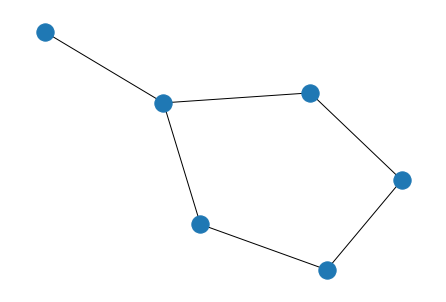

In [ ]:
nx.draw(petersen.subgraph([6, 3, 7, 8, 1, 5]))

Mettez en évidence (avec des arêtes rouges) un chemin hamiltonien (calculé à la main) sur le graphe de Petersen

Liste des aretes du chemin d'Hamilton : [(8, 7), (7, 6), (6, 10), (10, 9), (9, 4), (4, 2), (2, 5), (5, 3), (3, 1)]


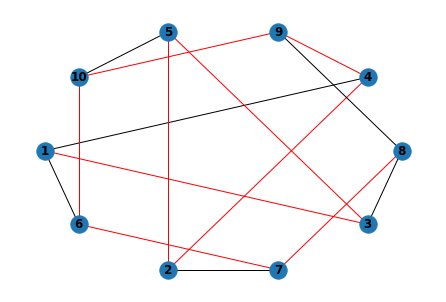

In [ ]:
hamilton_path_nodes = [8, 7, 6, 10, 9, 4, 2, 5, 3, 1]
hamilton_path_edges = [(8, 7), (7, 6), (6, 10), (10, 9), (9, 4), (4, 2), (2, 5), (5, 3), (3, 1)]

petersen_edges = list(petersen.edges())
tbl_edges_color = []

for i in range(len(petersen_edges)):
    # print(petersen_edges[i], petersen_edges[i] in hamilton_path_edges)
    if petersen_edges[i] in hamilton_path_edges or petersen_edges[i][::-1] in hamilton_path_edges:
        tbl_edges_color.append('red')
    else:
        tbl_edges_color.append('black')

print("Liste des aretes du chemin d'Hamilton :", hamilton_path_edges)
nx.draw_shell(petersen, font_weight='bold', with_labels=True, edge_color=tbl_edges_color)


Quelle est la taille d'un transversal minimum ? D'un couplage maximum ? D'un stable maximum ? D'une coloration minimum ?

Taille d'un tranversal minimu : 6


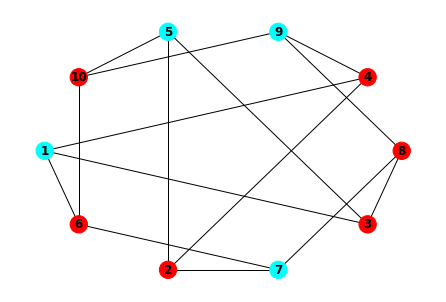

In [31]:
# Transversal minimum

tranversal_minimum_nodes = [8, 2, 3, 4 , 10, 6]

petersen_nodes = list(petersen.nodes())
tbl_nodes_color = []

for i in range(len(petersen_nodes)):
    if petersen_nodes[i] in tranversal_minimum_nodes:
        tbl_nodes_color.append("red")
    else: 
        tbl_nodes_color.append("cyan")

print(f"Taille d'un tranversal minimum : {len(tranversal_minimum_nodes)} (en rouge sur le graph ci dessous)")
nx.draw_shell(petersen, font_weight='bold', with_labels=True, node_color=tbl_nodes_color)

Nombre d'arêtes d'un couplage maximum : 5 (en rouge sur le graphe ci dessous)


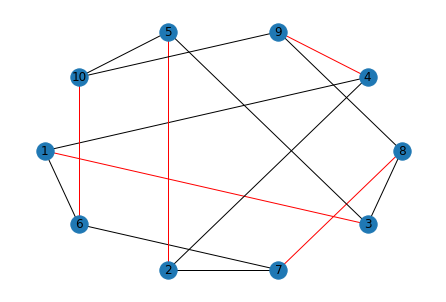

In [32]:
# Couplage maximum

couplage_minimum_edges = [
    (6, 10),
    (1, 3),
    (2, 5),
    (7, 8),
    (4, 9),
]

petersen_edges = list(petersen.edges())
tbl_edges_color = []

for i in range(len(petersen_edges)):
    if petersen_edges[i] in couplage_minimum_edges or petersen_edges[i][::-1] in petersen_edges :
        tbl_edges_color.append('red')
    else:
        tbl_edges_color.append('black')

print(f"Nombre d'arêtes d'un couplage maximum : {len(couplage_minimum_edges)} (en rouge sur le graphe ci dessous)")
nx.draw_shell(petersen, with_labels=True, edge_color=tbl_edges_color)

Taille d'un stable maximum : 6 (en rouge sur ci-dessous)


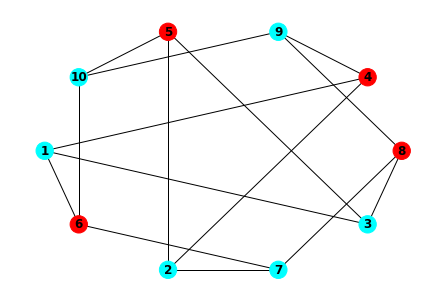

In [34]:
# Stable maximum

stable_minimum_nodes = [4, 5, 6, 8]
tbl_nodes_color = []

for i in range(len(petersen_nodes)):
    if petersen_nodes[i] in stable_minimum_nodes:
        tbl_nodes_color.append("red")
    else: 
        tbl_nodes_color.append("cyan")

print(f"Taille d'un stable maximum : {len(tranversal_minimum_nodes)} (en rouge sur ci-dessous)")
nx.draw_shell(petersen, font_weight='bold', with_labels=True, node_color=tbl_nodes_color)


In [42]:
# Coloration minimum 

b = nx.coloring.greedy_color(petersen, strategy='random_sequential')

l = []

for i in range(len(b)):
    if b[i+1] not in l :
        l.append(b[i+1])

print(f"Nombre chromatique = {max(l)+1}")

Nombre chromatique = 3


## Exercice 2 : Algorithme de Dijkstra
Ecrivez une fonction `dijkstra(G, s, d)` qui prend un graphe pondéré en entrée, et calcule le plus court chemin du sommet source `s` vers le sommet destination `d`. Votre fonction doit retourner la longueur de l'itinéraire (en m) ainsi que la liste des sommets permettant de reconstituer l'itinéraire.

## Exercice 3 : Application au calcul d'itinéraire
[OSMnx](https://geoffboeing.com/2016/11/osmnx-python-street-networks/) est un package Python permettant d'exploiter au format NetworkX les données disponibles sur [OpenStreetMap](https://openstreetmap.org). Il permet notamment de récupérer toutes les informations du réseau routier, piéton, de transports en commun, etc. et de le manipuler avec NetworkX. De nombreux exemples sont disponibles [sur cette page](https://github.com/gboeing/osmnx-examples).

Google Colaboratory permet d'exécuter des notebooks sur lesquels OSMnx et toutes ses dépendances sont installées.

**Note** : Vous pouvez aussi bien sûr travailler en local, mais il vous faudra installer OSMnx et toutes ses dépendances.

On commence par installer la librairie OSMnx :

In [ ]:
!apt install libspatialindex-dev
!pip install osmnx

On importe ensuite les paquets nécessaires :

In [ ]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)

Affichez le réseau routier de Lyon (peut demander plusieurs minutes) :

Par défaut, les sommets sont affichés ; quand ils sont trop nombreux, ils nuisent à la lisibilité du graphe. Affichez de nouveau le réseau routier, en jaune, dans une image de taille 10x10, et sans afficher les sommets.

Combien de sommets et d'arêtes ce graphes comporte-t-il ?

Superposez le réseau routier sur une carte de Lyon (il existe une fonction d'affichage d'OSMnx pour ça ;)) ; faites-en sorte que le nom d'une route soit affiché quand on clique dessus.

A présent, l'idée est de déterminer le plus court chemin entre les deux points géographiques fournis, à l'aide de l'algorithme de Dijkstra codé ci-dessus, et de l'afficher sur la carte.

Les numéros des sommets donnés par OpenStreetMap sont ceux de sa base de données *mondiale*, et ne sont donc pas très pratiques si on veut gérer des tableaux de sommets et repérer ces derniers par leur index. Commencez par *réétiqueter* les sommets, de sortes qu'ils soient numérotés `0, 1, 2...`

La fonction `get_nearest_node` renvoie le sommet / noeud du graphe le plus proche des coordonnées géographiques (latitude, longitude) données en paramètre. Récupérez les coordonnées des deux points géographiques fournis (via Google Maps, ou [OpenStreetMap](https://www.openstreetmap.org) en faisant un clic-droit puis *Affichez l'adresse*) et affichez les numéros des sommets les plus proches.

Appliquez votre fonction `dijkstra` aux deux sommets du graphe, puis superposez en rouge l'itinéraire obtenu :

Appliquez le réétiquetage inverse au chemin obtenu pour retrouver les ID uniques des sommets OpenStreetMap :